<a href="https://colab.research.google.com/github/Vilasini-R/AIML-lab-4/blob/main/Copy_of_AIML_III_Module_01_Lab_02_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

rng = np.random.default_rng(seed=42)
import pandas as pd

In [ ]:
dataset = datasets.fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [ ]:
print("Original target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Original target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [ ]:
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [ ]:
def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [ ]:
def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20 / 100)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy * 100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier:", trainAccuracy * 100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier: 16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy * 100, "%")

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy * 100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy * 100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print("Test accuracy:", testAccuracy * 100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

<ipython-input-7-f95662af0813>:4: RuntimeWarning: invalid value encountered in scalar divide
  return correct / len(gtlabel)


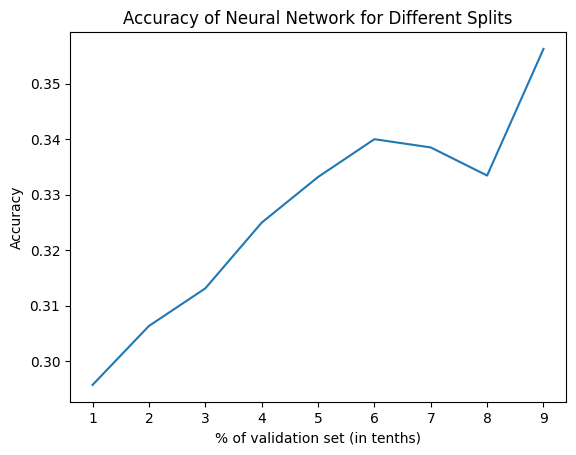

In [ ]:
accuracies_nn = []
for split_ratio in range(1, 11):
    train_data, train_labels, val_data, val_labels = split(alltraindata, alltrainlabel, split_ratio / 10)
    val_predictions = NN(train_data, train_labels, val_data)
    val_accuracy = Accuracy(val_labels, val_predictions)
    accuracies_nn.append(val_accuracy)

plt.plot(list(range(1, 11)), accuracies_nn)
plt.xlabel("% of validation set (in tenths)")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Network for Different Splits")
plt.show()


As we can see above, the performance doesn't change much for validation data above 10%.


<ipython-input-7-f95662af0813>:4: RuntimeWarning: invalid value encountered in scalar divide
  return correct / len(gtlabel)


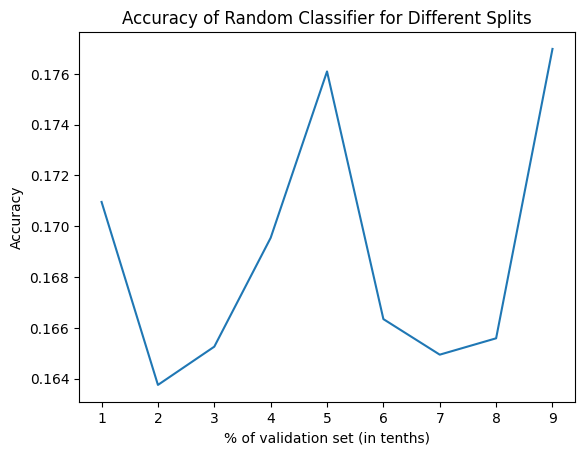

In [ ]:
accuracies_rc = []
for split_ratio in range(1, 11):
    train_data, train_labels, val_data, val_labels = split(alltraindata, alltrainlabel, split_ratio / 10)
    val_predictions = RandomClassifier(train_data, train_labels, val_data)
    val_accuracy = Accuracy(val_labels, val_predictions)
    accuracies_rc.append(val_accuracy)

plt.plot(list(range(1, 11)), accuracies_rc)
plt.xlabel("% of validation set (in tenths)")
plt.ylabel("Accuracy")
plt.title("Accuracy of Random Classifier for Different Splits")
plt.show()


The accuracy is always around 1/6 = 0.1666666.

2) How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

Because a KNN lacks standard training phase and parameters like weights and biases, the size of the training set is the only element that influences the size of the validation set.

This should make one thing very clear: this method does not lead to overfitting. The size of the training dataset does, however, affect this parameter; higher proportions will raise it by increasing the number of examples that are comparable to those in a particular dataset group, while lower proportions will lead to lower test accuracy rates.

However, parameterized models detect overfitting during training using the validation set instead of KNN.



3) What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

The size and complexity of the dataset determine the ideal split:
A balanced split like 60-20-20 (training-validation-test) ensures that there is enough training data for smaller datasets while keeping a sizable validation set.
Smaller validation percentages (e.g., 1% or 0.5%) may be advantageous for larger datasets since they maximize computing efficiency and learning potential by focusing more data on training.

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Shapes: alltraindata={}, alltrainlabel={}, testdata={}, testlabel={}".format(
    alltraindata.shape if hasattr(alltraindata, 'shape') else "Not a numpy array",
    alltrainlabel.shape if hasattr(alltrainlabel, 'shape') else "Not a numpy array",
    testdata.shape if hasattr(testdata, 'shape') else "Not a numpy array",
    testlabel.shape if hasattr(testlabel, 'shape') else "Not a numpy array"
))

def NN3(traindata, trainlabel, testdata):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(traindata, trainlabel)
    predlabel = neigh.predict(testdata)
    return predlabel

testpred_3nn = NN3(alltraindata, alltrainlabel, testdata)
testAccuracy_3nn = accuracy_score(testlabel, testpred_3nn)
print("Test accuracy with 3-Nearest Neighbors:", testAccuracy_3nn * 100, "%")

testpred_1nn = NN(alltraindata, alltrainlabel, testdata)
testAccuracy_1nn = Accuracy(testlabel, testpred_1nn)
print("Test accuracy with 1-Nearest Neighbors (from earlier):", testAccuracy_1nn * 100, "%")


Shapes: alltraindata=(16496, 8), alltrainlabel=(16496,), testdata=(4144, 8), testlabel=(4144,)
Test accuracy with 3-Nearest Neighbors: 36.05212355212355 %
Test accuracy with 1-Nearest Neighbors (from earlier): 34.91795366795367 %


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc * 100, "%")

testpred = NN(alltraindata, alltrainlabel, testdata)
print("Test accuracy:", Accuracy(testlabel, testpred) * 100, "%")

Average validation accuracy: 33.764890643687565 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

In [ ]:
def kNN1(traindata, trainlabel, query, k=1):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    k_indices = np.argpartition(dist, k)[:k]
    k_labels = trainlabel[k_indices]
    return np.bincount(k_labels).argmax()

In [ ]:
def kNN(traindata, trainlabel, testdata, k=1):
    predlabel = np.array([kNN1(traindata, trainlabel, i, k) for i in testdata])
    return predlabel

In [ ]:
def compare_kNN_accuracies(alldata, alllabel, splitpercent, iterations):
    avg_acc_k1 = AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=lambda td, tl, qd: kNN(td, tl, qd, k=1))
    avg_acc_k3 = AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=lambda td, tl, qd: kNN(td, tl, qd, k=3))
    return avg_acc_k1, avg_acc_k3

In [ ]:
split_sizes = [0.2, 0.5, 0.75]
iterations = 10

for split_size in split_sizes:
    avg_acc_k1, avg_acc_k3 = compare_kNN_accuracies(alltraindata, alltrainlabel, split_size, iterations)
    print(f"Split size {split_size*100}%:")
    print(f"Average validation accuracy for k=1: {avg_acc_k1*100:.2f}%")
    print(f"Average validation accuracy for k=3: {avg_acc_k3*100:.2f}%\n")

Split size 20.0%:
Average validation accuracy for k=1: 30.89%
Average validation accuracy for k=3: 31.57%

Split size 50.0%:
Average validation accuracy for k=1: 33.13%
Average validation accuracy for k=3: 33.61%

Split size 75.0%:
Average validation accuracy for k=1: 33.93%
Average validation accuracy for k=3: 34.72%



Data Creation: Retrieve and preprocess the California housing data set by converting target values ​​to integers.

Model definition: Explain the capabilities of NN1, NN, RandomClassifier, k-NN classifiers.

Accuracy audits: Define the characteristics of accuracy audits and divide the record into school, certification, and test units.

Accuracy Evaluation: Check the accuracy of training and validation of NN and RandomClassifier.

Average Accuracy: Use reasonable accuracy and calculate over multiple iterations.

K-NN comparison: Extend the okay-NN classifier to handle k=1 and okay=three, and test their overall performance on a fact partition.

Questions and Answers

1) Does averaging the validation accuracy across multiple splits give more consistent results?

Yes, more consistent results are typically obtained by averaging the validation accuracy across numerous splits. The unpredictability brought on by the specific selection of training and validation sets is minimized by carrying out repeated splits. This reduces the impact of any one split, resulting in a more steady and trustworthy estimate of the model's performance.



2) Does it give more accurate estimate of test accuracy?

By averaging the validation accuracy over a number of splits, one can typically approximate the test accuracy more accurately. so that it reduces the likelihood of bias arising from a particular data split and accounts for the unpredictable nature of every split. An estimate that has a large number of splits is more likely to properly represent the model's real performance.



3) What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

An estimate that is more accurate is usually obtained with many rounds. More iterations that compute the average accuracy over a larger number of splits reduce the volatility of the estimate. This makes it possible to assess the model's performance more consistently and accurately. There are trade-offs between the number of iterations and computing cost, though, since more iterations necessitate longer processing periods.




4) Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

Increasing the number of iterations can help mitigate the issues caused by having a relatively limited training or validation dataset, albeit it is not a perfect solution. With very small sample numbers, the model may still exhibit excessive volatility and poor generalization. The inherent limitations resulting from sparse data cannot be entirely overcome, however putting the model through numerous iterations can yield a more accurate evaluation of its performance. Generally speaking, a sufficiently large dataset is best for effectively training and verifying the model.



